# Orbit Homework

Katie Foster

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [74]:
s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
radians = UNITS.radian
degrees = UNITS.degrees;

In [75]:
# And an inition condition (with everything in SI units)

r_0 = 147e9 * m

x_0 = 1.52e11 * m
y_0 = 0 * m
vx_0 = 0 * m / s
vy_0 = 0 * m / s

init = State(x = x_0,
             y = y_0, 
             vx = vx_0,
             vy = vy_0)

,values
x,152000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,0.0 meter / second


In [76]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=1e7 * s)

,values
init,x 152000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,10000000.0 second


In [77]:
def universal_gravitation(r, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    unpack(system)
    
    Fg = G * m1 * m2 / (r.mag **2) #uses law of universal gravitation to find earth-sun force
    θ = -r.hat() #represents the direction of a vector as a unit vector
    
    ForceVector = Fg * θ 
    
    return ForceVector


In [78]:
r = Vector(init.x, init.y)

<Quantity([1.52e+11 0.00e+00], 'meter')>

In [79]:
universal_gravitation(r, system)

<Quantity([-3.43125985e+22 -0.00000000e+00], 'newton')>

In [80]:
def slope_func(state, t, system):
    '''Slope function takes in state, t, and system, and uses the force
    from universal gravitation function to calculate acceleration in the x and y
    directions and then returns change in velocity and change in position'''
    x, y, vx, vy = state
    unpack(system)    
    
    r = Vector(x, y)

    force = universal_gravitation(r, system)
    acceleration = force/m2 
    dvxdt, dvydt = acceleration[0], acceleration[1]
    dxdt, dydt = vx, vy
    
    return dxdt, dydt, dvxdt, dvydt

In [81]:
slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(0.0, 'meter / second')>,
 <Quantity(-0.005745579120498614, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [82]:
results, details = run_ode_solver(system, slope_func)#, events=event_func)
details;

In [83]:
t_final = get_last_label(results) * s

<Quantity(5713010.98468864, 'second')>

In [84]:
ts = linspace(t_0, t_final, 2001)

<Quantity([0.00000000e+00 2.85650549e+03 5.71301098e+03 ... 5.70729797e+06
 5.71015448e+06 5.71301098e+06], 'second')>

In [85]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

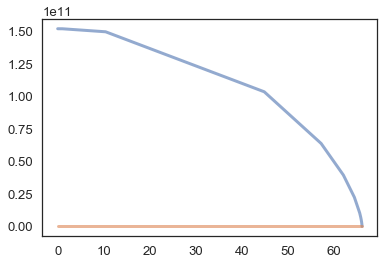

In [87]:
plot(results.x, label='x')
plot(results.y, label='y')

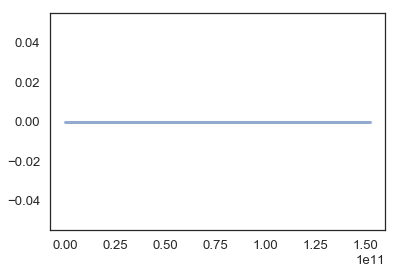

In [88]:
plot(results.x, results.y, label='')
